# Introduction

This notebook is the EDA for "New York City Taxi Trip Duration". We used Google Maps API to have a better visualization of the pickup and dropoff data.

The steps to install gmaps for Jupyter notebook has been mentioned in the ReadMe file.
Since while downloading the notebook, Google Map images don't show up I have included the pics separately so it is easy to see how the output looks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
import codecs
import calendar
import datetime
from time import *
import seaborn as sns
import matplotlib.animation as animation
import numpy as np
from numpy import *
from matplotlib.pyplot import *
import gmaps.datasets
from IPython.display import Image
from geopy.distance import vincenty
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBRegressor

In [2]:
def distance(source_lat, source_long, dest_lat, dest_long):
    #source = [source_lat, source_long]
    #dest = [dest_lang, dest_long]
    #dist = vincenty(source,dest).miles
    radius = 6371 # km
    dlat = math.radians(dest_lat-source_lat)
    dlon = math.radians(dest_long-source_long)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(source_lat)) \
        * math.cos(math.radians(dest_lat)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    dist = radius * c

    return dist

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
dist = []
for i in range(len(train)):
    dist.append(distance(train.pickup_latitude[i],train.pickup_longitude[i],
                                    train.dropoff_latitude[i],train.dropoff_longitude[i]))

train["distance"] = dist

In [5]:
dist_test = []
for i in range(len(test)):
    dist_test.append(distance(test.pickup_latitude[i],test.pickup_longitude[i],
                                    test.dropoff_latitude[i],test.dropoff_longitude[i]))

test["distance"] = dist_test

In [6]:
 train["id"][0] 

'id2875421'

In [7]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188588


In [8]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2.746426
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2.759239
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,1.306155
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,5.269088
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,0.960842


In [9]:
test.loc[625133,:]

id                              id0621643
vendor_id                               2
pickup_datetime       2016-01-01 00:00:22
passenger_count                         2
pickup_longitude                 -73.9818
pickup_latitude                   40.7169
dropoff_longitude                -73.9693
dropoff_latitude                  40.7694
store_and_fwd_flag                      N
distance                          5.93202
Name: 625133, dtype: object

In [10]:
unique=test.id.unique()

In [11]:
len(unique)

625134

In [12]:
gmaps.configure(api_key="AI...") #put your API

# Plotting pickups and dropoffs on Google maps

We will plot the pick up point to see from where the maximum number of pickups happen. We can see that very few trips are to and from the aiport.

In [13]:
new_york_coordinates = (40.75, -74.00)
fig = gmaps.figure(center=new_york_coordinates, zoom_level=10)
locations = train.loc[:100000,["pickup_latitude","pickup_longitude"]]
heatmap = gmaps.heatmap_layer(locations)
#,max_intensity=10, point_radius=3.0
heatmap.gradient=[
    'black',
    'red',
    'yellow'
]
fig.add_layer(heatmap)
fig

Since the maps wont be plotted while uploading the notebook I saved them and will display here as an image. If you try ruuning the code it will work out perfectly fine

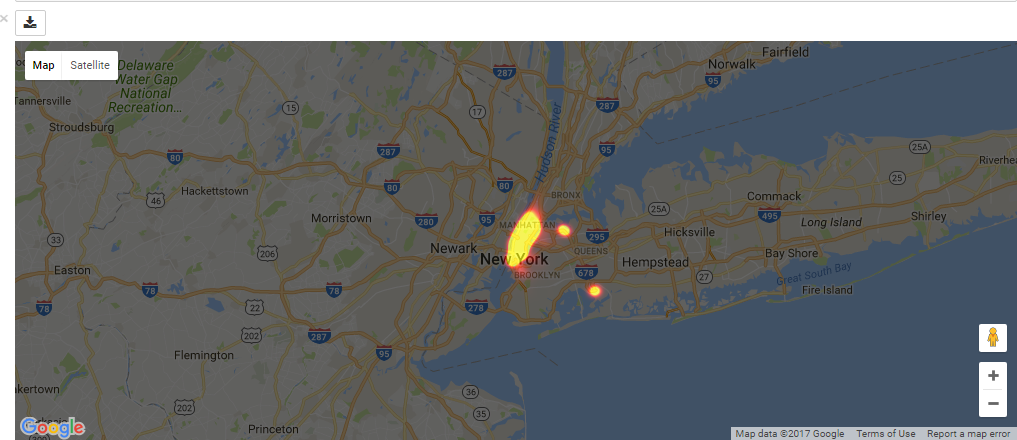

In [14]:
Image('Images/Pickups.PNG')

In [15]:
# Drop off
new_york_coordinates = (40.75, -74.00)
fig = gmaps.figure(center=new_york_coordinates, zoom_level=10)
locations = train.loc[:100000,["dropoff_latitude","dropoff_longitude"]]
heatmap = gmaps.heatmap_layer(locations)

heatmap.gradient=[
    'black',
    'yellow',
    'blue'
]
fig.add_layer(heatmap)
fig

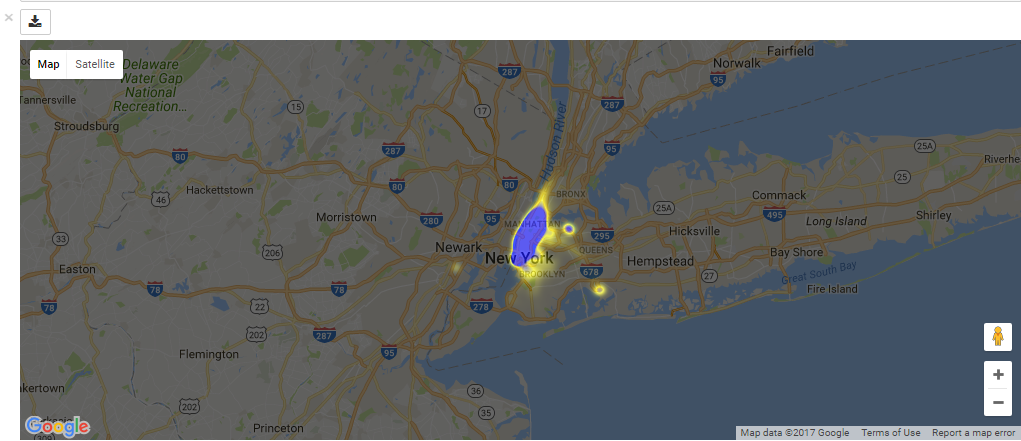

In [16]:
Image('Images/Dropoff.PNG')

Pickup and drop off almost overlaps. And most of the pick ups and drops offs are in Manhattan. The two separated points seems like trip to the JFK and LGA airports.

We create different lists to store information extracted out of the pickup_datetime attribute.

In [17]:
pickup_date = []
pickup_time = []
pickup_day = []
pickup_hr = []
pickup_month = []

In [18]:
pickup_datetime = train["pickup_datetime"]

for i in range(len(train)):
    split_row = pickup_datetime[i].split()

    # date
    pickup_date.append(split_row[0])
    # time
    pickup_time.append(split_row[1])
    # day of week
    pickup_day.append(datetime.datetime.strptime(pickup_date[i], "%Y-%m-%d").strftime("%A"))
    # month of the year
    split_dt = pickup_date[i].split('-')
    pickup_month.append(calendar.month_name[int(split_dt[1])])
    # hour of day
    split_hr = pickup_time[i].split(':')
    if split_row[0] == '00':
        pickup_hr.append(24)
    else:
        pickup_hr.append(int(split_hr[0]))

In [19]:
# Adding the columns to train dataset
train["pickup_hr"] = pickup_hr
train["pickup_day"] = pickup_day
train["pickup_month"] = pickup_month

/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:
/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


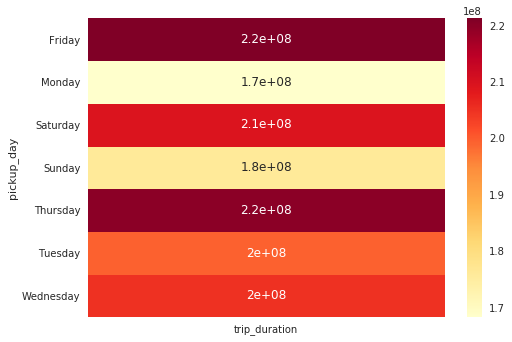

In [20]:
# Plots a heatmap showing the maximum duration of trips grouped by days of the week
day = train.loc[:,["pickup_day","trip_duration"]]
day_grp = day.groupby('pickup_day').sum()
sns.heatmap(day_grp, annot=True,cmap="YlOrRd")
plt.show()

In [21]:
sunday = train.query("pickup_day == 'Sunday'")
monday = train.query("pickup_day == 'Monday'")
tuesday = train.query("pickup_day == 'Tuesday'")
wednesday = train.query("pickup_day == 'Wednesday'")
thursday = train.query("pickup_day == 'Thursday'")
friday = train.query("pickup_day == 'Friday'")
saturday = train.query("pickup_day == 'Saturday'")

/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


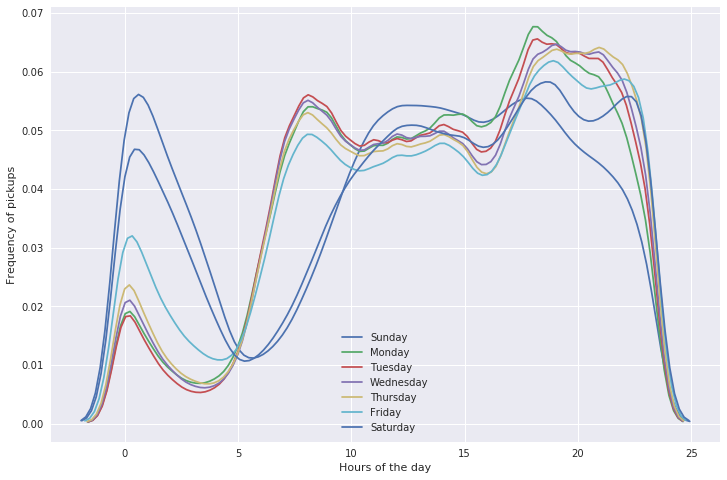

In [22]:
plt.figure(figsize=(12,8))
ax = sns.kdeplot(sunday.pickup_hr,label="Sunday")
ax = sns.kdeplot(monday.pickup_hr,label="Monday")
ax = sns.kdeplot(tuesday.pickup_hr,label="Tuesday")
ax = sns.kdeplot(wednesday.pickup_hr,label="Wednesday")
ax = sns.kdeplot(thursday.pickup_hr,label="Thursday")
ax = sns.kdeplot(friday.pickup_hr,label="Friday")
ax = sns.kdeplot(saturday.pickup_hr,label="Saturday")
ax.set_xlabel("Hours of the day")
ax.set_ylabel("Frequency of pickups")
plt.show()

In [23]:
train["pickup_hr"] =  train["pickup_hr"].convert_objects(convert_numeric=True)

/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


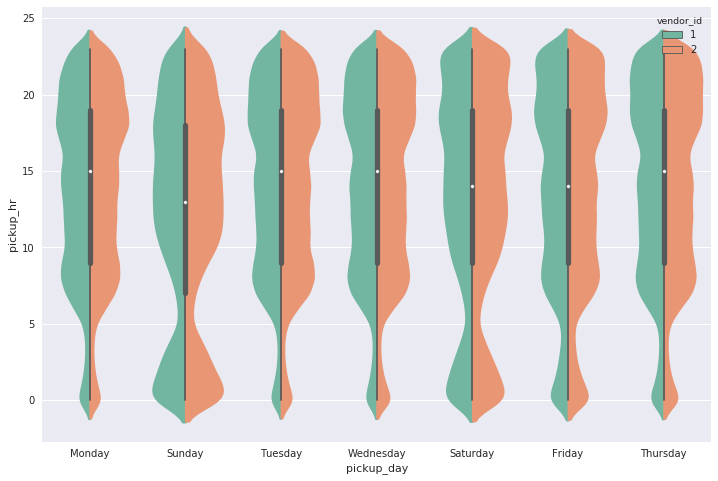

In [24]:
plt.figure(figsize=(12,8))
axe = sns.violinplot(x="pickup_day", y="pickup_hr", hue="vendor_id", data=train, split=True,palette='Set2',scale="count")
plt.show()

/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:
/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


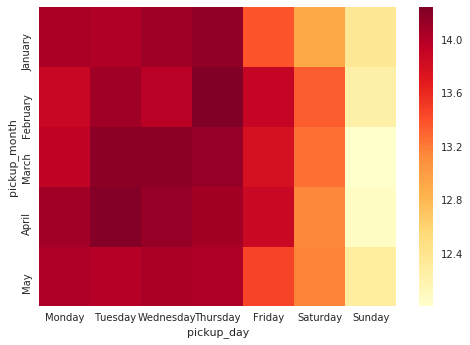

In [25]:
# Creating a pivot of train to create heat map between Pickup Months and Pickup Days
pvt = train.pivot_table(values='pickup_hr',index='pickup_month',columns='pickup_day')
# Re-ordering columns
pvt = pvt[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]

# Re-ordering indexes
pvt = pvt.reindex(["January","February","March","April","May"])
sns.heatmap(pvt,cmap='YlOrRd')
plt.show()

In [26]:
train["duration_hrs"] = train["trip_duration"]/3600

/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:
/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


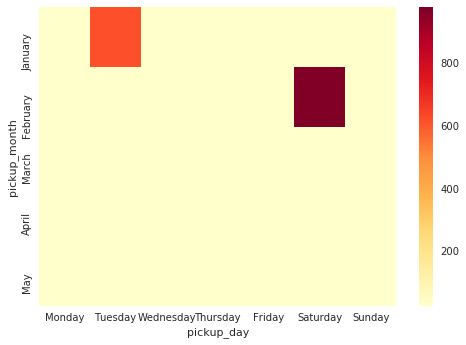

In [27]:
grp_sum = train.groupby(['pickup_day','pickup_month'])['duration_hrs'].transform(max) == train['duration_hrs']
# Creating a pivot of train to create heat map between Pickup Months and Pickup Days
pvt = train[grp_sum].pivot_table(values='duration_hrs',index='pickup_month',columns='pickup_day')
# Re-ordering columns
pvt = pvt[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]

# Re-ordering indexes
pvt = pvt.reindex(["January","February","March","April","May"])
sns.heatmap(pvt,cmap='YlOrRd')
plt.show()

In [28]:
sns.set(style="whitegrid", color_codes=True)

fig = plt.figure(figsize=(15,15))
# Frequency distribution of passengers
plt.subplot(221)

ax = sns.countplot(x="passenger_count", data=train,palette=sns.cubehelix_palette(8))
plt.ylabel('Frequency')
plt.xlabel('Number of Passengers')
plt.title('Frequency distribution of passengers')

# Frequency distribution of days
plt.subplot(222)
ax = sns.countplot(x="pickup_day", data=train,palette="GnBu_d")
plt.ylabel('Frequency')
plt.xlabel('Days')
plt.title('Frequency distribution of days')

# Frequency distribution of months
plt.subplot(223)
ax = sns.countplot(x="pickup_month", data=train,palette="BuGn_r")
plt.ylabel('Frequency')
plt.xlabel('Months')
plt.title('Frequency distribution of months')

# Frequency distribution of hours
plt.subplot(224)
ax = sns.countplot(x="pickup_hr", data=train,palette="YlOrRd")
plt.ylabel('Frequency')
plt.xlabel('Hours')
plt.title('Frequency distribution of hours')

/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


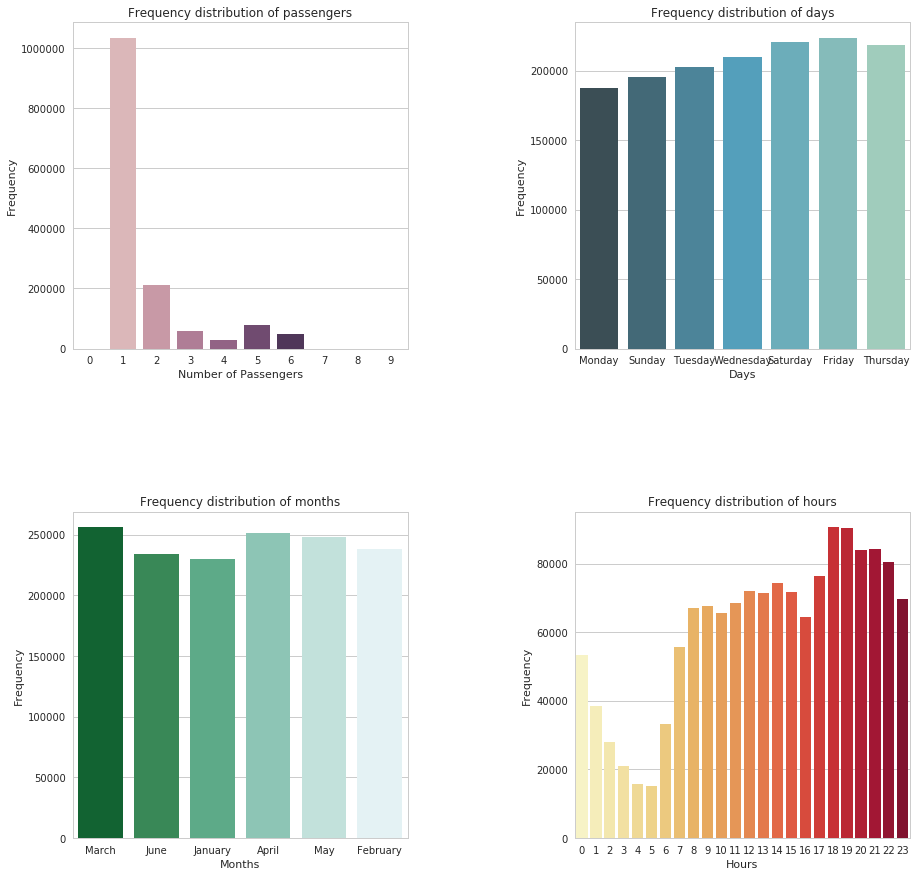

In [29]:
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

Busy hours are in the evening from 6 - 9. Mostly it might be the time people leave office. And it is seen that the passenger travelling alone has the highest trend. The number of books is almost same for all the months with March being slightly higher than the others.
Similary, the days also have almost the same number of books with number of books slightly higher for Friday

# Animate the locations on a plot

/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


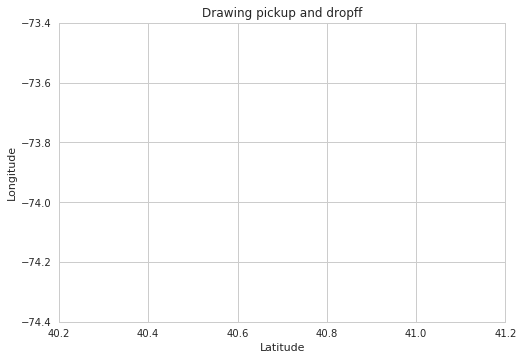

In [30]:

#%matplotlib nbagg
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(40.2, 41.2), ylim=(-74.4, -73.4))
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_title("Drawing pickup and dropff")
line, = ax.plot([], [])

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = (train.pickup_latitude[i], train.dropoff_latitude[i])
    y = (train.pickup_longitude[i],train.dropoff_longitude[i])
    plot(x,y,'-o')
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10000, interval=20, blit=True)
#anim.save('animation.mp4')
plt.show()

In [31]:
long_dist = []
for i in range(len(train)):
    if train.duration_hrs[i] > 24:
        long_dist.append(i)

# Let's have a look at the trip durations which were more than a day long

In [32]:
new_york_coordinates = (40.75, -74.00)
fig = gmaps.figure(center=new_york_coordinates, zoom_level=10)

for i in range(len(long_dist)):
    pickup = train.loc[long_dist[i],["pickup_latitude","pickup_longitude"]]
    dropoff = train.loc[long_dist[i],["dropoff_latitude","dropoff_longitude"]]
    pickup2dropoff = gmaps.directions_layer(pickup, dropoff)    
    fig.add_layer(pickup2dropoff)
#fig.add_layer(kfc_layer)
fig

There were around four trips which took longer than 24hrs and of the four, two were to the JFK airport. And all these trips were done by vendor_1.
We can also have a look at the rides which took more than 12hrs.

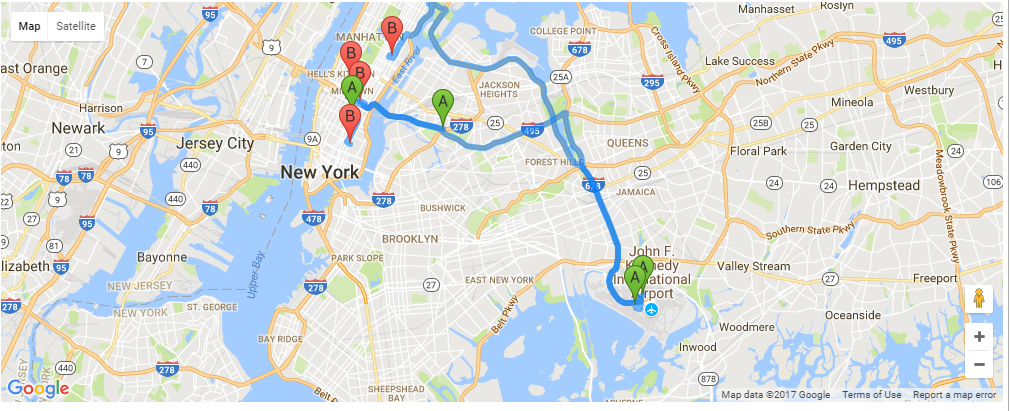

In [33]:
Image('Images/LongTrip.PNG')

# JFK vs LGA airport trips

In [34]:
def airportTrips(lat1,lat2, long1,long2):
    PU = []
    DO = []

    for i in range(len(train)):
        if(lat1 <= train.pickup_latitude[i] <= lat2 and long1 <= train.pickup_longitude[i] <= long2): 
            PU.append(i)
        if(lat1 <= train.dropoff_latitude[i] <= lat2 and long1 <= train.dropoff_longitude[i] <= long2):
            DO.append(i)
            
    pickup = []
    dropoff = []
    for i in range(len(PU)):
        pickup.append(train.loc[PU[i],["pickup_latitude","pickup_longitude"]])
    for i in range(len(DO)):
        dropoff.append(train.loc[DO[i],["dropoff_latitude","dropoff_longitude"]] )
    PU = pd.DataFrame(pickup)
    DO = pd.DataFrame(dropoff)
    
    heatlayer1 = gmaps.heatmap_layer(PU)
    heatlayer2 = gmaps.heatmap_layer(DO)
    return heatlayer1,heatlayer1
    

In [35]:
fig = gmaps.figure()
# LGA
heatlayerLGA,heatlayerLGA=airportTrips(lat1=40.768,lat2=40.774,long1=-73.8794,long2=-73.868)
fig.add_layer(heatlayerLGA)
fig.add_layer(heatlayerLGA)

# JFK
heatlayerJFK,heatlayerJFK=airportTrips(lat1=40.640,lat2=40.750,long1=-73.794,long2=-73.777)
fig.add_layer(heatlayerJFK)
fig.add_layer(heatlayerJFK)
fig

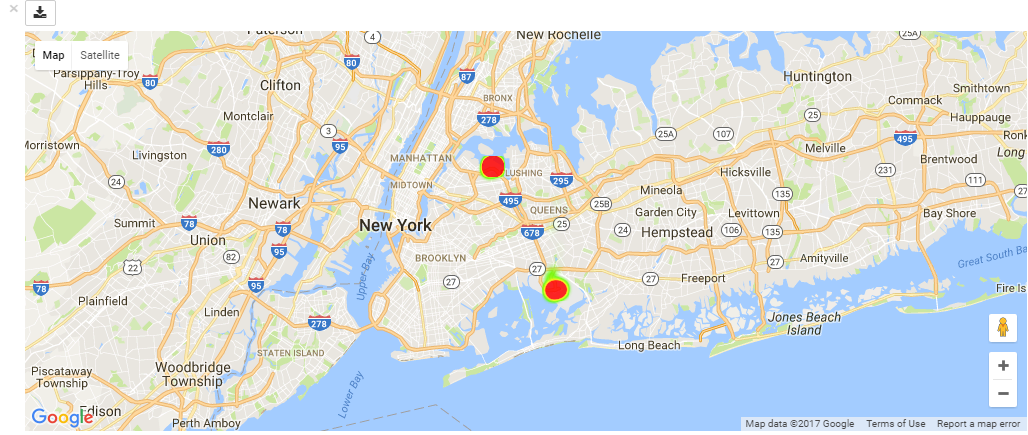

In [36]:
Image('Images/Airport.PNG')

People travelling to and from JFK airport is comparitively the same as LGA

In [37]:
from sklearn.cluster import KMeans
wcss = []

X = train.loc[:,["distance"]].values
y = train.duration_hrs
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(X,y)
    wcss.append(kmeans.inertia_)

/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


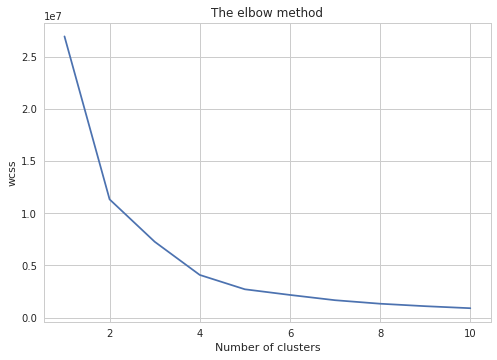

In [38]:
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [39]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++',max_iter = 300,
                    n_init = 10, random_state = 0)
kmeans.fit(X,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [40]:
kmeans.cluster_centers_

array([[   1.28295428],
       [  10.76419249],
       [   6.11547589],
       [ 692.73870446],
       [   3.17557145],
       [  20.14508558]])

In [41]:
plt.scatter(train["distance"],train["duration_hrs"],c='red')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,0],marker = '*')

/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


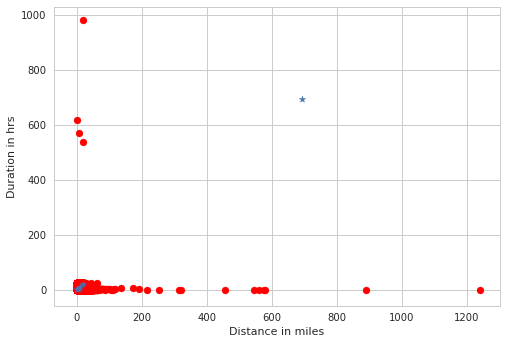

In [42]:
plt.xlabel("Distance in miles")
plt.ylabel("Duration in hrs")
plt.show()

In [43]:
train["speed"] = train["distance"]*train["duration_hrs"]

/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


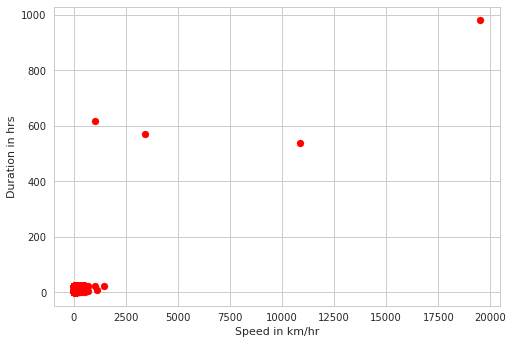

In [44]:
plt.scatter(train["speed"],train["duration_hrs"],c='red')
plt.xlabel("Speed in km/hr")
plt.ylabel("Duration in hrs")
plt.show()

In [45]:
X_train = train.iloc[:,11:12]
y_train = train.iloc[:,16]
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2.746426
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2.759239
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,1.306155
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,5.269088
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,0.960842


In [47]:
X_test = test.iloc[:,9:10]

In [48]:
y_test = regressor.predict(X_test)

/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


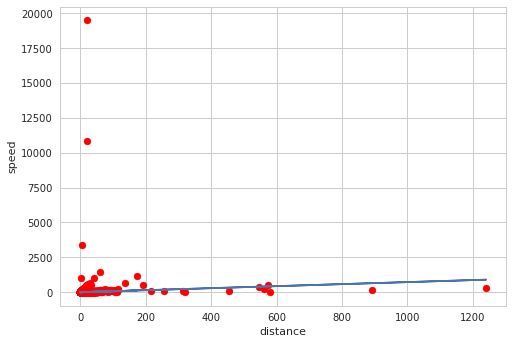

In [49]:
plt.scatter(X_train,y_train,color="red")
plt.plot(X_train,regressor.predict(X_train))
plt.xlabel("distance")
plt.ylabel("speed")
plt.show()

# NYC weather 

In [50]:
weather = pd.read_csv("nyc_Jan_Jun_2016_weat.csv")

In [51]:
weather.head(10)

,DATE,LATITUDE,LONGITUDE,SNOW,PRCP,SNWD,TAVG,TMAX,TMIN
0,20160101,41.0639,-73.7722,0.0,0.0,-9999.0,-9999,-9999,-9999
1,20160102,41.0639,-73.7722,0.0,0.0,-9999.0,-9999,-9999,-9999
2,20160103,41.0639,-73.7722,0.0,0.0,-9999.0,-9999,-9999,-9999
3,20160104,41.0639,-73.7722,0.0,0.0,-9999.0,-9999,-9999,-9999
4,20160105,41.0639,-73.7722,0.0,0.0,-9999.0,-9999,-9999,-9999
5,20160106,41.0639,-73.7722,0.0,0.0,-9999.0,-9999,-9999,-9999
6,20160107,41.0639,-73.7722,0.0,0.0,-9999.0,-9999,-9999,-9999
7,20160108,41.0639,-73.7722,0.0,0.0,-9999.0,-9999,-9999,-9999
8,20160112,41.0639,-73.7722,0.0,0.0,-9999.0,-9999,-9999,-9999
9,20160113,41.0639,-73.7722,-9999.0,0.0,-9999.0,-9999,-9999,-9999


In [52]:
weather.loc[weather.SNOW == -9999, 'SNOW'] = NaN
weather.loc[weather.PRCP == -9999.0, 'PRCP'] = NaN
weather.loc[weather.SNWD == -9999.0, 'SNWD'] = NaN
weather.loc[weather.TAVG == -9999, 'TAVG'] = NaN
weather.loc[weather.TMAX == -9999, 'TMAX'] = NaN
weather.loc[weather.TMIN == -9999, 'TMIN'] = NaN

In [53]:
weather.head()

,DATE,LATITUDE,LONGITUDE,SNOW,PRCP,SNWD,TAVG,TMAX,TMIN
0,20160101,41.0639,-73.7722,0.0,0.0,NaN,NaN,NaN,NaN
1,20160102,41.0639,-73.7722,0.0,0.0,NaN,NaN,NaN,NaN
2,20160103,41.0639,-73.7722,0.0,0.0,NaN,NaN,NaN,NaN
3,20160104,41.0639,-73.7722,0.0,0.0,NaN,NaN,NaN,NaN
4,20160105,41.0639,-73.7722,0.0,0.0,NaN,NaN,NaN,NaN


In [54]:
pickup_date = weather["DATE"].apply(str)
weather_date = []

for i in range(len(weather)):
    
    # day of week
    weather_date.append(datetime.datetime.strptime(pickup_date[i], "%Y%m%d").strftime("%A"))
    
weather["DAY"] = weather_date

In [55]:
weather.dtypes

DATE           int64
LATITUDE     float64
LONGITUDE    float64
SNOW         float64
PRCP         float64
SNWD         float64
TAVG         float64
TMAX         float64
TMIN         float64
DAY           object
dtype: object

### Imputation of missing values

We impute the missing values using mean grouped by days of the week. In this case the median won't be a good method of imputation because there are a lot of missing values and the median will be zero in most of the cases

In [56]:
meanSnow = weather.groupby('DAY')['SNOW'].transform('mean')
meanPrec = weather.groupby('DAY')['PRCP'].transform('mean')
meanSnwd = weather.groupby('DAY')['SNWD'].transform('mean')
meanTavg = weather.groupby('DAY')['TAVG'].transform('mean').astype(int)
meanTmin = weather.groupby('DAY')['TMIN'].transform('mean').astype(int)
meanTmax = weather.groupby('DAY')['TMAX'].transform('mean').astype(int)

In [57]:
weather["SNOW"] = weather["SNOW"].fillna(meanSnow)
weather["PRCP"] = weather["PRCP"].fillna(meanPrec)
weather["SNWD"] = weather["SNWD"].fillna(meanSnwd)
weather["TAVG"] = weather["TAVG"].fillna(meanTavg)
weather["TMIN"] = weather["TMIN"].fillna(meanTmin)
weather["TMAX"] = weather["TMAX"].fillna(meanTmax)

In [58]:
# Extracting month from Date
month_weather = []
for i in range(len(weather)):
    date = weather["DATE"][i]/100
    month = int(date%100)
    month_weather.append(calendar.month_name[month])
    
weather["MONTH"] = month_weather

Let's see the precipitation and snow on a monthly basis

/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


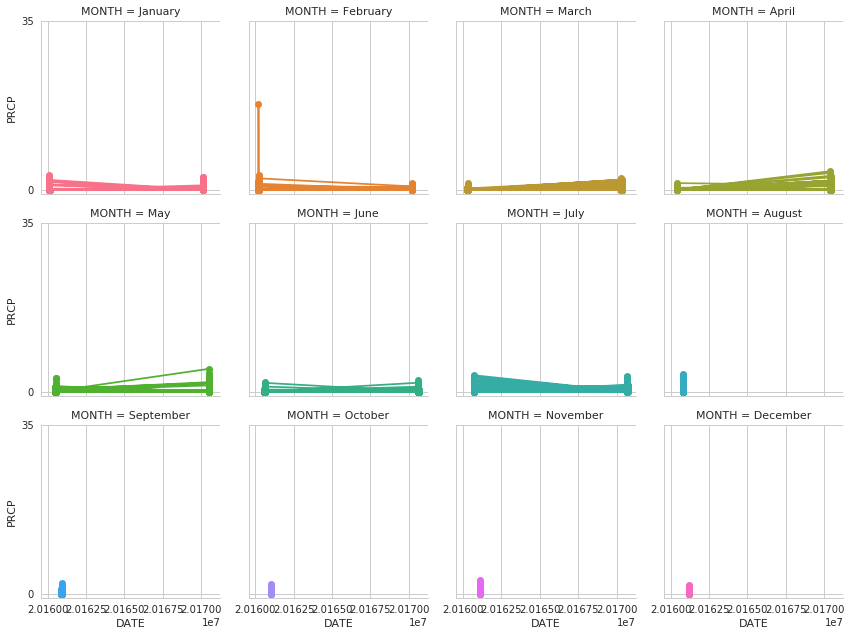

In [59]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(weather,col="MONTH", hue="MONTH", col_wrap=4, size=3)

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "DATE", "PRCP", marker="o")

# Adjust the tick positions and labels
grid.set(yticks=[0, 35])

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
plt.show()

we can see that there has been slight precipitation from the month of January to July

/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


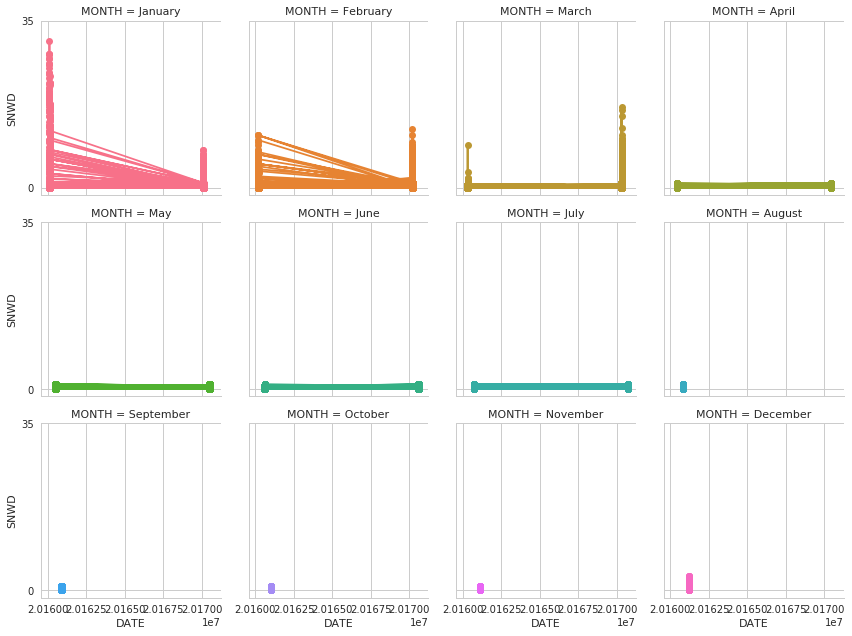

In [60]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(weather,col="MONTH", hue="MONTH", col_wrap=4, size=3)

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "DATE", "SNWD", marker="o")

# Adjust the tick positions and labels
grid.set(yticks=[0, 35])

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
plt.show()

Month of January and February faced heavy snow fall

## XGBoost linear 

In [61]:
from sklearn.cross_validation import KFold, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error

X = train.loc[:,["distance"]].values
y = train.duration_hrs

err = []
kf = KFold(y.shape[0], n_folds=2, shuffle=True, random_state=0)


/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [62]:
kf

sklearn.cross_validation.KFold(n=1458644, n_folds=2, shuffle=True, random_state=0)

In [63]:
for train_index, test_index in kf:
    xgb_model = xgb.XGBRegressor().fit(X[train_index],y[train_index])
    xtest = X[test_index]
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    err.append(mean_squared_error(actuals, predictions))
err

[3.0394418979108728, 2.3192326652466408]

/home/jerinroy/anaconda_v3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


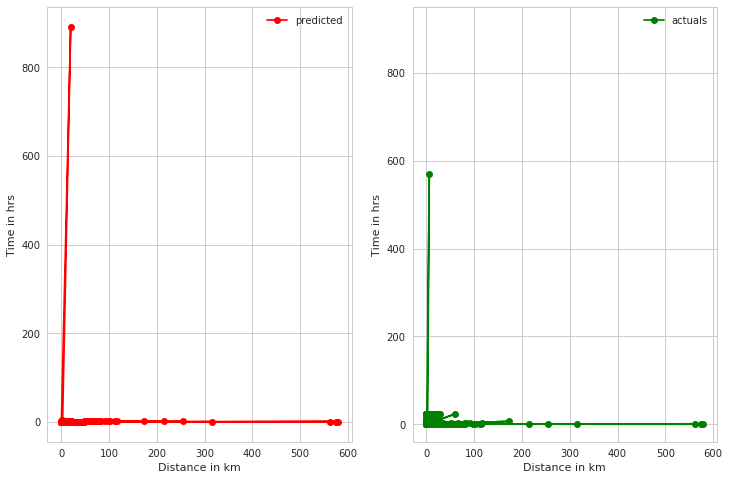

In [64]:
sns.set(style="whitegrid", color_codes=True)

fig = plt.figure(figsize=(12,8))
# Frequency distribution of passengers
plt.subplot(121)

plot(xtest,predictions,color='red',marker='o',label="predicted")
plt.xlabel("Distance in km")
plt.ylabel("Time in hrs")
plt.legend()


plt.subplot(122)

plot(xtest,actuals,color='green',marker='o',label="actuals")
plt.xlabel("Distance in km")
plt.ylabel("Time in hrs")
plt.legend()
plt.ylim(-40,950)
plt.show()